# Feature Engineering - Handling Missing Value

#### Different types of Missing Data:
1. ##### Missing Completely at Random, MCAR:
A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.
2. ##### Missing Data Not At Random(MNAR): Systematic missing Values
There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.
3. #### Missing At Random(MAR): 
Someone purposefully hides their information while filling info.

### Ways to handling Missing Values

1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

In [1]:
#Importing Libraries and Dataset. Here using Titanic dataset
import pandas as pd

In [2]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# We have 177 null values in Age, 2 in Embarked and 687 in Cabin
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
#Just Exploring the Data
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [5]:
import numpy as np
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0) #Here We are just creating new variable to know the importance of the missing data

##find the percentage of null values
df['cabin_null'].mean()

0.7710437710437711

In [6]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

#### 1. Mean/ Median /Mode imputation
When should we apply?
Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with Mean/Median/Mode

In [7]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived']) # I am taking only some columes, you can use all cols.
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
## Lets go and see the percentage of missing values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [9]:
#Writing function to fill the missing data
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [10]:
median=df.Age.median()
median

28.0

In [11]:
# Passing the Variable as Age. You can pass any variable which you want to fill the missing value.
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [12]:
# As we can see, there are some difference in the standard deviation of orizional Age cols and Age_median. Difference should be minimum.
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


In [13]:
# Here you can see, Age_median feature got created after the imputation, and it has 0 null values. You can do it in the same (Age) cols.
df.isnull().sum()

Survived        0
Age           177
Fare            0
Age_median      0
dtype: int64

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

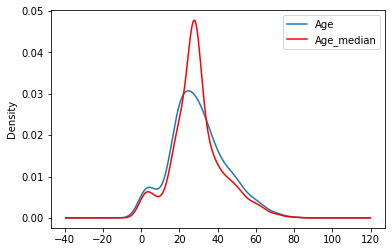

In [15]:
# Checking the difference between orizinal and imputed fearure with the help of graph

fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#### Disadvantages
1. As we can see in the above graph, Change or Distortion in the original variance
2. Impacts Correlation

#### 2.Random Sample Imputation

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? 
It assumes that the data are missing completely at random(MCAR)

In [16]:
# We already lodad data above with 'Age','Fare' & 'Survived cols. We will use them for Random sample imputation
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [17]:
# Here With the help of Random sample techniques, we will fill the missing value of 'Age' feature
df.isnull().sum()

Survived        0
Age           177
Fare            0
Age_median      0
dtype: int64

In [18]:
df['Age'].isnull().sum()

177

In [19]:
#Listing Random sample for missing value
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [20]:
#Finding the index
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [21]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [22]:
median=df.Age.median()

In [23]:
median

28.0

In [24]:
impute_nan(df,"Age",median)  #Imputed the Age with Median for checking purpose

In [25]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [26]:
#Here, Age_random feature got created with 0 null value.
df.isnull().sum()

Survived        0
Age           177
Fare            0
Age_median      0
Age_random      0
dtype: int64

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

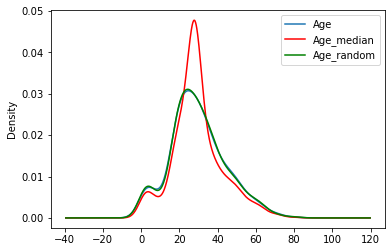

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

As you can see, there is less distortion in variance compared to the Age_median. So we will use Age_random feature for our use.

##### Capturing NAN values with a new feature

It works well if the data are not missing completely at random.
We will create a new feature "Age_NAN" and fill 1 where is null value and 0 for rest.
Again, we will fill 'Age' null value with any suitabel techniques.
This techniques will help us to know the importance of the missing data.

In [29]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [30]:
import numpy as np
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [31]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [32]:
df.Age.median()

28.0

In [33]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [34]:
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


#### Advantages
1. Easy to implement
2. Captures the importance of missing values

##### Disadvantages
1. Creating Additional Features(Curse of Dimensionality)

#### End of Distribution imputation

In [35]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


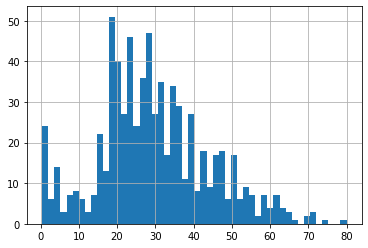

In [36]:
df.Age.hist(bins=50)

In [37]:
# We are taking extreme value (Genearly after 3 std.) and will replace the null value with this extreme value.
extreme=df.Age.mean()+3*df.Age.std()
extreme

73.27860964406095

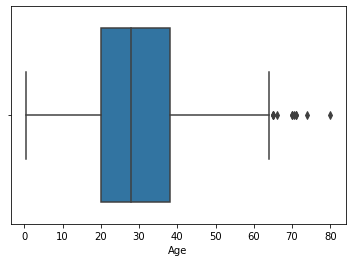

In [38]:
# Trying to see the exteme value by using box plot
import seaborn as sns
sns.boxplot('Age',data=df)

In [39]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [40]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [41]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


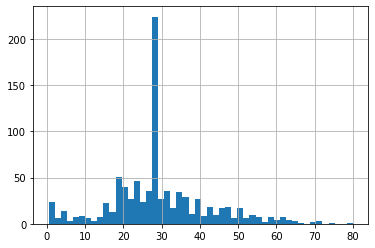

In [42]:
df['Age'].hist(bins=50)  #You can see most of the value is in between 27-29. Becaue we have filled the missing value by median

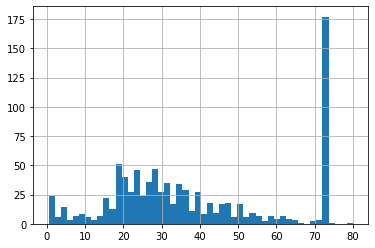

In [43]:
df['Age_end_distribution'].hist(bins=50) #You can see most of the value is in between 70-75. Becaue we have filled the missing value by extreme value.

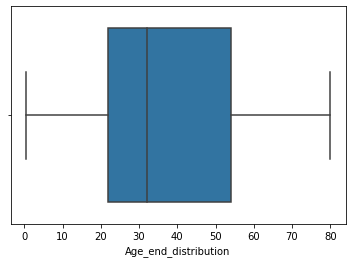

In [44]:
# Now we can see, we dont have any outliers if we take the feature Age_end_distribution. 
sns.boxplot('Age_end_distribution',data=df)

#### Arbitrary Value Imputation
It consists of replacing NAN by an arbitrary value

In [45]:
df=pd.read_csv("titanic.csv", usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [46]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)

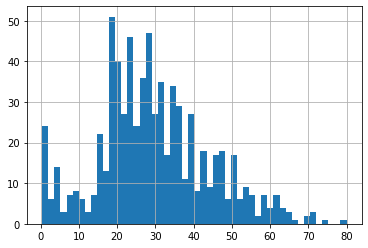

In [47]:
df['Age'].hist(bins=50)

### Disadvantages

- Distorts the original distribution of the variable
- If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
- Hard to decide which value to use

##### How To Handle Categroical Missing Values

##### Frequent Category Imputation

In [48]:
df=pd.read_csv('house_price.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [49]:
df.shape

(1460, 4)

In [50]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [51]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

### Compute the frequency with every feature

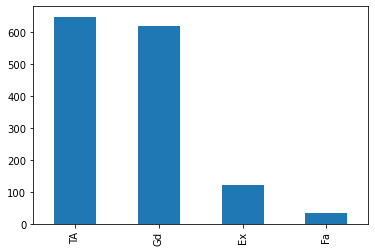

In [52]:
df['BsmtQual'].value_counts().plot.bar()

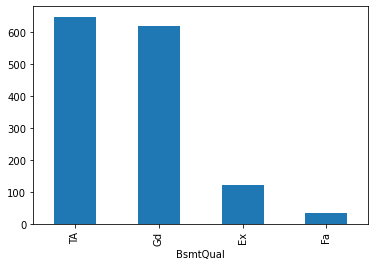

In [53]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

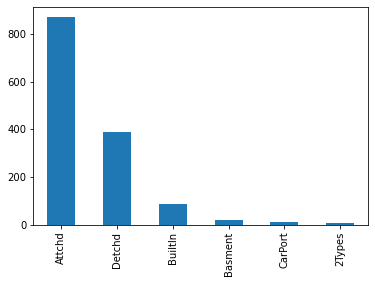

In [54]:
df['GarageType'].value_counts().plot.bar()

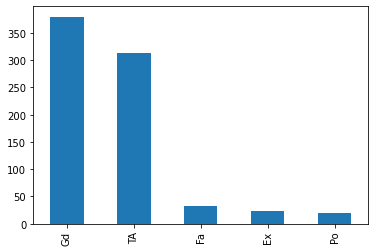

In [55]:
df['FireplaceQu'].value_counts().plot.bar()

In [56]:
df['GarageType'].value_counts().index[0] # We can use df['GarageType'].mode()[0] as well.

'Attchd'

In [57]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [58]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [59]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

#### Advantages
1. Easy To implement
2. Fater way to implement
#### Disadvantages
1. Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
2. It distorts the relation of the most frequent label

##### Adding a variable to capture NAN

In [60]:
df=pd.read_csv('house_price.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [61]:
import numpy as np
df['BsmtQual_Var']=np.where(df['BsmtQual'].isnull(),1,0)

In [62]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [63]:
df['BsmtQual'].mode()[0]

'TA'

In [64]:
frequent=df['BsmtQual'].mode()[0]

In [65]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [66]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [67]:
df['FireplaceQu_Var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

In [68]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


#### Suppose if you have more frequent categories, we just replace NAN with a new category

In [69]:
df=pd.read_csv('house_price.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [70]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [71]:
def impute_nan(df,variable):
    df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [72]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [73]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [74]:
df=df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

In [75]:
df.head()

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
